# Netflix EDA and Movie Recommendation System using NLP

![netflix_img](https://cdn.mos.cms.futurecdn.net/RovHr6r3brJtxHRZUcX9i9-970-80.jpg.webp)

### Netflix is a popular online streaming platform that offers a wide variety of movies, TV shows, documentaries, and other forms of video content.
### Here I have done an analysis of the netflix dataset with some visualization and a recommendation system.

### Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# import warnings filter
import warnings
warnings.simplefilter('ignore')

%matplotlib inline

In [2]:
#mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Load dataset

In [3]:
netflix = pd.read_csv('/content/drive/MyDrive/netflix_titles.csv')
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Data preperation and data cleaning
* Look at things like shape, information, decsription, missing values and duplicated values
* Handle missing, incorrect and invalid data

In [4]:
print("Rows:", netflix.shape[0])
print("Columns:", netflix.shape[1])

Rows: 8807
Columns: 12


In [5]:
netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
netflix.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
show_id,8807,8807,s1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
type,8807,2,Movie,6131,NaN,NaN,NaN,NaN,NaN,NaN,NaN
title,8807,8807,Dick Johnson Is Dead,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
director,6173,4528,Rajiv Chilaka,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cast,7982,7692,David Attenborough,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country,7976,748,United States,2818,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date_added,8797,1767,"January 1, 2020",109,NaN,NaN,NaN,NaN,NaN,NaN,NaN
release_year,8807.0,NaN,NaN,NaN,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0
rating,8803,17,TV-MA,3207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
duration,8804,220,1 Season,1793,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
netflix.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [8]:
print('Duplicated values:',netflix.duplicated().sum())

Duplicated values: 0


#### Observations
* The dataset contains 8807 rows and 12 columns
* All the columns are type object except release_year which is int64
* We have missing values in country, date_added, rating, cast, director and duration.

### Exploratory Data Analysis

Let's look at the missing values first

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


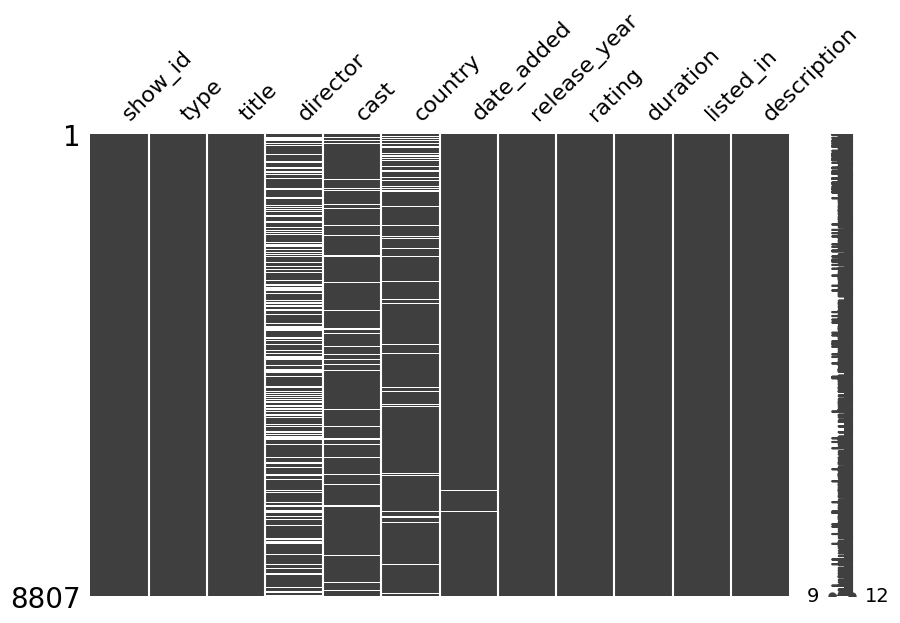

In [9]:
#missing values
print(netflix.isnull().sum())
#visualization
msno.matrix(netflix, figsize=(10,6))
plt.show()

In [10]:
#check percentage of missing values
netflix.isnull().sum()/(len(netflix))*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

Missing values:
* director: 2634 missing values (30%)
* cast: 825 missing values (9.4%)
* country: 831 missing values (9.4%)
* date_added: 10 missing values (0.11%)
* rating: 4 missing values (0.05%)
* duration: 3 missing values (0.03%)

The missing values in **"date_added"** and **"rating"** we can fill with mode (most common value).

The missing values in **"country", "director"** and **"cast"** we can assign **"No country"**, **"No director"** and **"No cast"**.

**"Duration"** is not that important and is only 3 missing so we will drop the missing values.

Let´s also change the column **"listed_in"** to **"genre"** for better understanding.

In [11]:
netflix['director'].fillna('No director', inplace=True)
netflix['cast'].fillna('No cast', inplace=True)
netflix['country'].fillna('No country', inplace=True)
netflix['date_added'] = netflix['date_added'].fillna(netflix['date_added'].mode()[0])
netflix['rating'] = netflix['rating'].fillna(netflix['country'].mode()[0])
netflix.dropna(subset=['duration'], inplace=True)
netflix.rename(columns={'listed_in': 'genre'}, inplace=True)

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
genre           0
description     0
dtype: int64


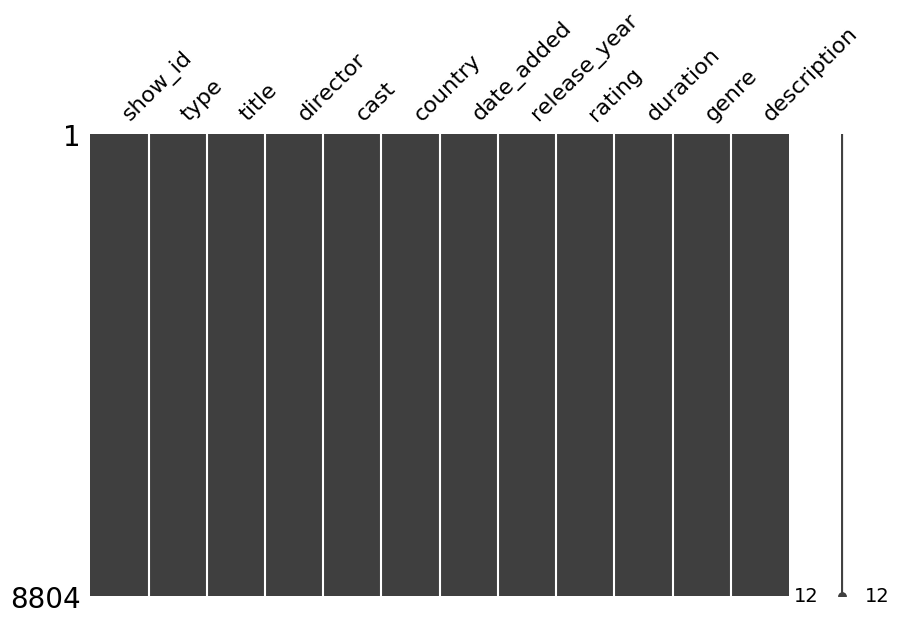

In [12]:
#check to confirm there are no missing values left
print(netflix.isnull().sum())
msno.matrix(netflix, figsize=(10,6))
plt.show()

### Movies vs TV-Shows

In [13]:
netflix.type.value_counts()

Movie      6128
TV Show    2676
Name: type, dtype: int64

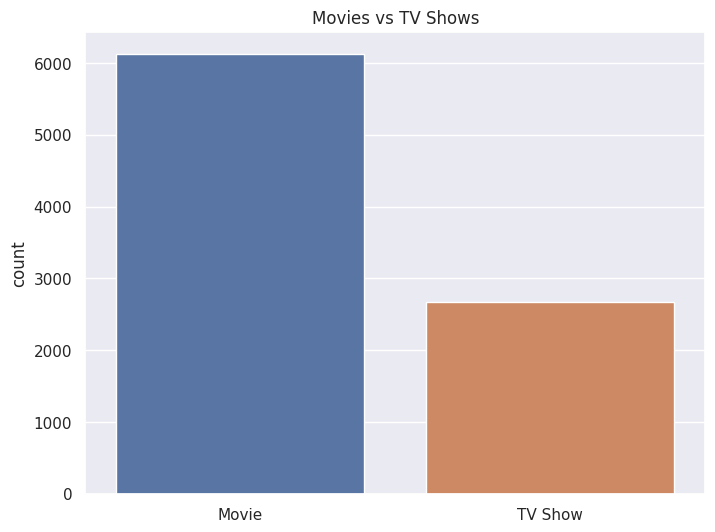

In [14]:
#visualization
sns.set(style="darkgrid")
plt.figure(figsize=(8,6))
sns.countplot(x="type", data=netflix)
plt.title("Movies vs TV Shows")
plt.xlabel('')
plt.show()

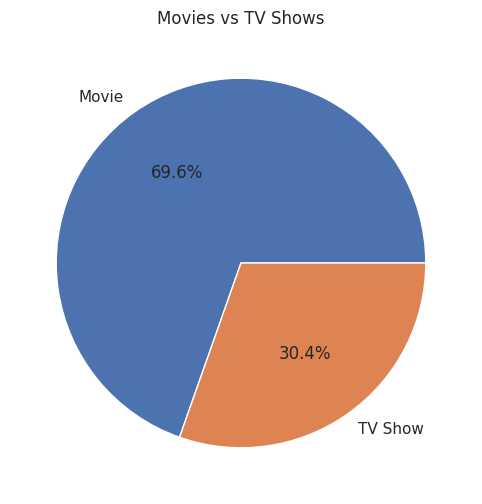

In [15]:
# pie chart
plt.figure(figsize=(8,6))
netflix['type'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Movies vs TV Shows")
plt.ylabel('')
plt.show()

* The majority of the netflix dataset are movies with over 6000 movies, which is roughly 2/3 and tv-shows are about 1/3.

### **Rating**

In [16]:
netflix['rating'].value_counts()

TV-MA            3207
TV-14            2160
TV-PG             863
R                 799
PG-13             490
TV-Y7             334
TV-Y              307
PG                287
TV-G              220
NR                 80
G                  41
TV-Y7-FV            6
United States       4
NC-17               3
UR                  3
Name: rating, dtype: int64

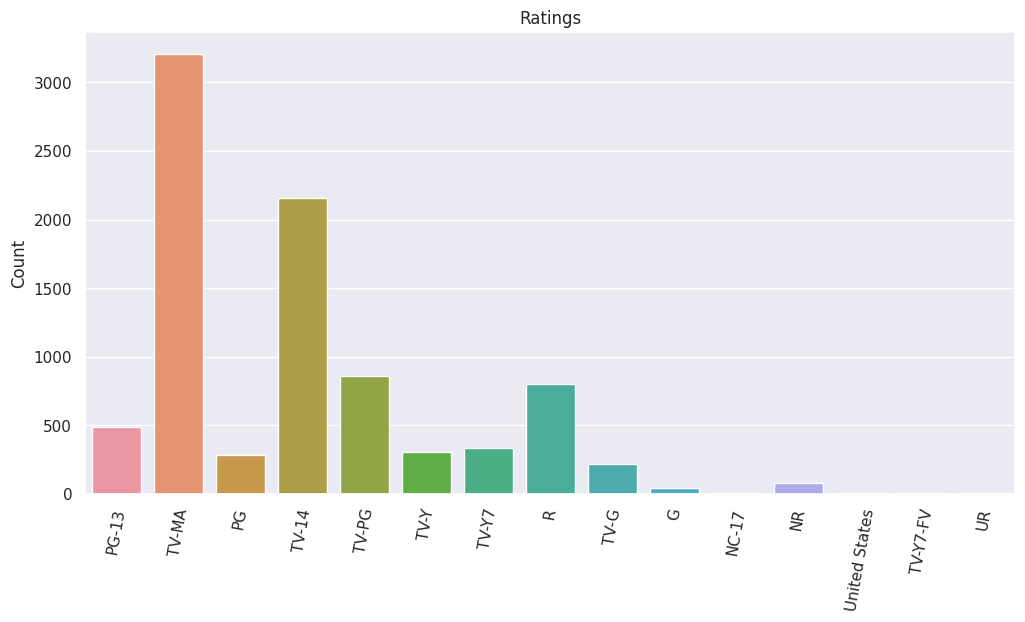

In [17]:
plt.figure(figsize=(12,6))
sns.countplot(x='rating', data=netflix)
plt.title('Ratings')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(rotation=80)
plt.show()

#### dimension reduction ratings
We have alot of unnecessary and confusing ratings so we will reduce them.
I will use https://www.spectrum.net/support/tv/tv-and-movie-ratings-descriptions for reference

In [18]:
def group_ratings(rating):
    if rating in ['PG-13', 'TV-14']:
        return 'TEENS'
    elif rating in ['TV-MA', 'R', 'NC-17',]:
        return 'ADULTS'
    elif rating in ['PG', 'TV-PG']:
        return 'KIDS WITH GUIDANCE'
    elif rating in ['TV-Y', 'TV-Y7', 'TV-G', 'G', 'TV-Y7-FV']:
        return 'KIDS'
    else:
        return 'OTHER'

netflix['rating'] = netflix['rating'].apply(group_ratings)

In [19]:
print(netflix['rating'].value_counts())

ADULTS                4009
TEENS                 2650
KIDS WITH GUIDANCE    1150
KIDS                   908
OTHER                   87
Name: rating, dtype: int64


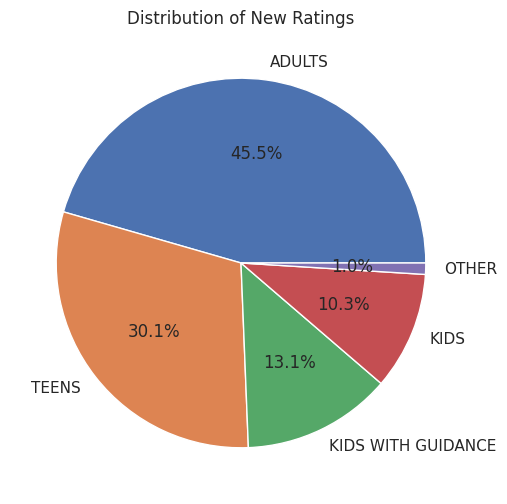

In [20]:
# create a pie chart of the new ratings
plt.figure(figsize=(8,6))
netflix['rating'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title("Distribution of New Ratings")
plt.ylabel('')
plt.show()

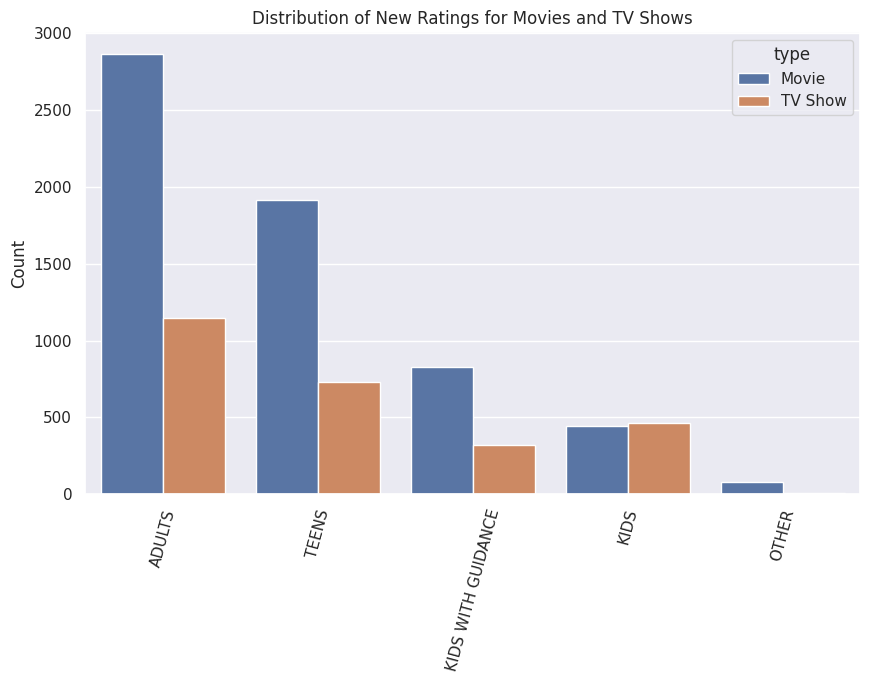

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(x='rating', hue='type', data=netflix, order=netflix['rating'].value_counts().index)
plt.title('Distribution of New Ratings for Movies and TV Shows')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(rotation=75)
plt.show()

* Most common rating is Adult for both Movies and TV-Shows.

### Let's find out what the most common words/ names are in Title, Cast and Director using WordCloud

#### Most common words in Title

In [22]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
from wordcloud import WordCloud

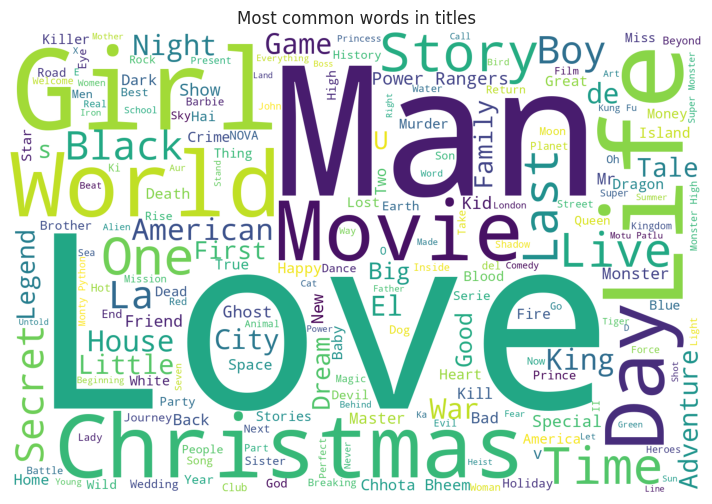

In [24]:
# Join all titles into a single string
text = ' '.join(netflix['title'])

# Create a word cloud
wordcloud = WordCloud(width=1500, height=1000, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud)
plt.title("Most common words in titles")
plt.axis('off')
plt.show()

#### Most common actor names

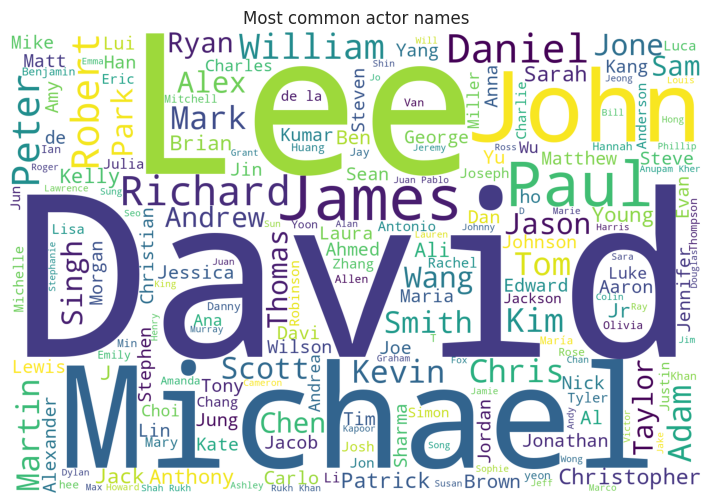

In [25]:
wordcloud = WordCloud(width=1500, height=1000, background_color='white').generate(" ".join(netflix.cast.str.replace('cast', '')))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud)
plt.title("Most common actor names")
plt.axis('off')
plt.show()

#### Most common director names

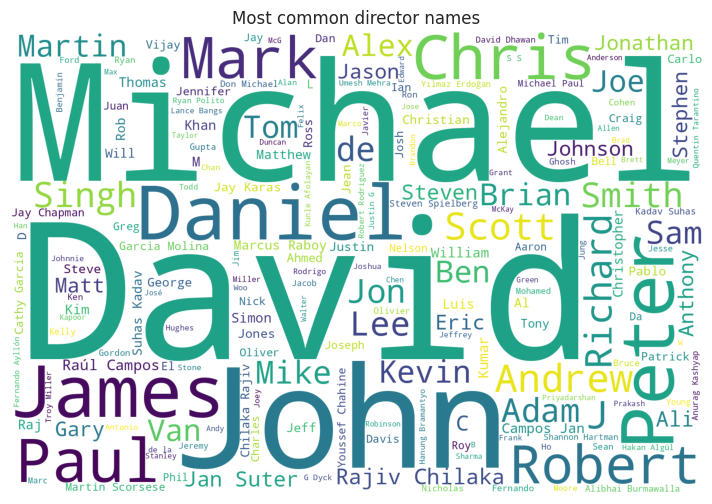

In [26]:
wordcloud = WordCloud(width=1500, height=1000, background_color='white').generate(" ".join(netflix.director.str.replace('director', '')))

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud)
plt.title("Most common director names")
plt.axis('off')
plt.show()

In [27]:
netflix.genre.value_counts()

Dramas, International Movies                          362
Documentaries                                         359
Stand-Up Comedy                                       334
Comedies, Dramas, International Movies                274
Dramas, Independent Movies, International Movies      252
                                                     ... 
Kids' TV, TV Action & Adventure, TV Dramas              1
TV Comedies, TV Dramas, TV Horror                       1
Children & Family Movies, Comedies, LGBTQ Movies        1
Kids' TV, Spanish-Language TV Shows, Teen TV Shows      1
Cult Movies, Dramas, Thrillers                          1
Name: genre, Length: 514, dtype: int64

* Most common words in title are **Love, Man, Girl, World** and **life**. And as we can see we mostly have dramas in our dataset, and these words sounds very typical for that genre.

* Most common actor names are **David, Lee, Daniel** and **Michael**.
* Most common director names are **David, Michael** and **John**.

#### Releases per year

In [28]:
netflix['release_year'].value_counts().sort_index()

1925       1
1942       2
1943       3
1944       3
1945       4
        ... 
2017    1031
2018    1147
2019    1030
2020     953
2021     592
Name: release_year, Length: 74, dtype: int64

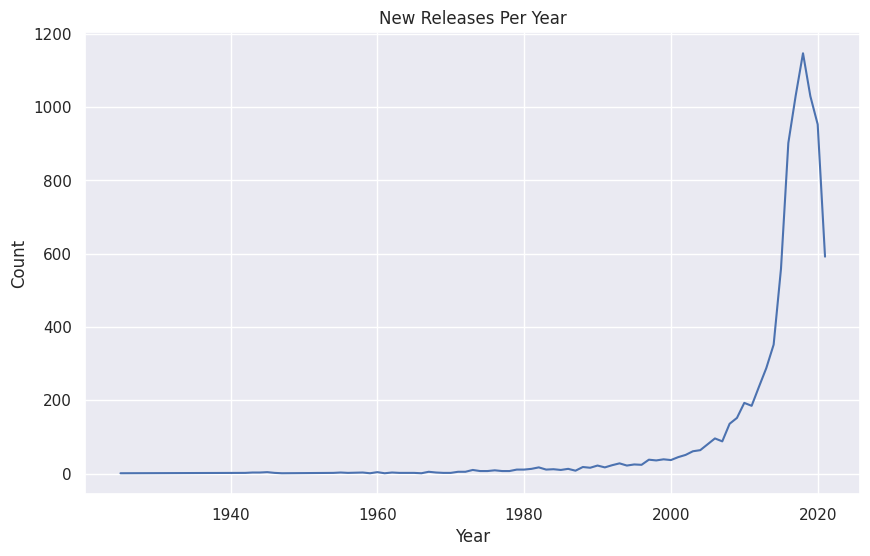

In [29]:
# Get the count of 'release_year' and sort by index
year_counts = netflix['release_year'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(year_counts.index, year_counts.values)
plt.title('New Releases Per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True)
plt.show()

There were big increase in releases from 2000 with a peak around 2019, then we see a big decrease after that. I would guess that´s because of the pandemic, when most production in tv series and movies stopped.

#### Oldest movies

In [30]:
netflix[netflix['type'] == 'Movie'].sort_values('release_year').head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
8205,s8206,Movie,The Battle of Midway,John Ford,"Henry Fonda, Jane Darwell",United States,"March 31, 2017",1942,TEENS,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...
7790,s7791,Movie,Prelude to War,Frank Capra,No cast,United States,"March 31, 2017",1942,TEENS,52 min,"Classic Movies, Documentaries",Frank Capra's documentary chronicles the rise ...
8763,s8764,Movie,WWII: Report from the Aleutians,John Huston,No cast,United States,"March 31, 2017",1943,KIDS WITH GUIDANCE,45 min,Documentaries,Filmmaker John Huston narrates this Oscar-nomi...
8739,s8740,Movie,Why We Fight: The Battle of Russia,"Frank Capra, Anatole Litvak",No cast,United States,"March 31, 2017",1943,KIDS WITH GUIDANCE,82 min,Documentaries,This installment of Frank Capra's acclaimed do...
8660,s8661,Movie,Undercover: How to Operate Behind Enemy Lines,John Ford,No cast,United States,"March 31, 2017",1943,KIDS WITH GUIDANCE,61 min,"Classic Movies, Documentaries",This World War II-era training film dramatizes...


#### Oldest TV-Shows

In [31]:
netflix[netflix['type'] == 'TV Show'].sort_values('release_year').head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genre,description
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,No director,No cast,No country,"December 30, 2018",1925,TEENS,1 Season,TV Shows,This collection restores films from women who ...
1331,s1332,TV Show,Five Came Back: The Reference Films,No director,No cast,United States,"February 9, 2021",1945,ADULTS,1 Season,TV Shows,This collection includes 12 World War II-era p...
7743,s7744,TV Show,Pioneers of African-American Cinema,"Oscar Micheaux, Spencer Williams, Richard E. N...",No cast,United States,"February 1, 2017",1946,TEENS,1 Season,TV Shows,This newly preserved collection features more ...
8541,s8542,TV Show,The Twilight Zone (Original Series),No director,Rod Serling,United States,"July 1, 2017",1963,TEENS,4 Seasons,"Classic & Cult TV, TV Sci-Fi & Fantasy","Hosted by creator Rod Serling, this groundbrea..."
8189,s8190,TV Show,The Andy Griffith Show,No director,"Andy Griffith, Ron Howard, Don Knotts, Frances...",United States,"July 1, 2017",1967,KIDS,8 Seasons,"Classic & Cult TV, TV Comedies",Homespun humor and easygoing Sheriff Andy Tayl...


#### Genre

In [32]:
netflix['genre']

0                                           Documentaries
1         International TV Shows, TV Dramas, TV Mysteries
2       Crime TV Shows, International TV Shows, TV Act...
3                                  Docuseries, Reality TV
4       International TV Shows, Romantic TV Shows, TV ...
                              ...                        
8802                       Cult Movies, Dramas, Thrillers
8803               Kids' TV, Korean TV Shows, TV Comedies
8804                              Comedies, Horror Movies
8805                   Children & Family Movies, Comedies
8806       Dramas, International Movies, Music & Musicals
Name: genre, Length: 8804, dtype: object

We will create a python list and use pandas explode function to seperate all the genres.

In [33]:
# turn string into python list
netflix['genre'] = netflix['genre'].str.split(', ')
netflix['genre'].head()

0                                      [Documentaries]
1    [International TV Shows, TV Dramas, TV Mysteries]
2    [Crime TV Shows, International TV Shows, TV Ac...
3                             [Docuseries, Reality TV]
4    [International TV Shows, Romantic TV Shows, TV...
Name: genre, dtype: object

In [34]:
print("before .explode" ,netflix.shape)
netflix2 = netflix.explode('genre')
print("after .explode", netflix2.shape)

before .explode (8804, 12)
after .explode (19320, 12)


In [35]:
pd.DataFrame(netflix2[netflix2['type'] == 'Movie'].genre.value_counts()).head()

,genre
International Movies,2752
Dramas,2427
Comedies,1674
Documentaries,869
Action & Adventure,859


In [36]:
pd.DataFrame(netflix2[netflix2['type'] == 'TV Show'].genre.value_counts()).head()

,genre
International TV Shows,1351
TV Dramas,763
TV Comedies,581
Crime TV Shows,470
Kids' TV,451


* Most common genres in movies and TV-shows are International, Dramas and Comedies

### Top Actors

In [37]:
netflix['cast'] = netflix['cast'].str.split(', ')

In [38]:
print(netflix.shape)
netflix3 = netflix.explode('cast')
netflix3.shape

(8804, 12)


(64948, 12)

In [39]:
# I will start from the 2nd index, because the majority in index 0 is "No Cast", and I want to exclude that.
top_actors = netflix3['cast'].value_counts().index[1:11]

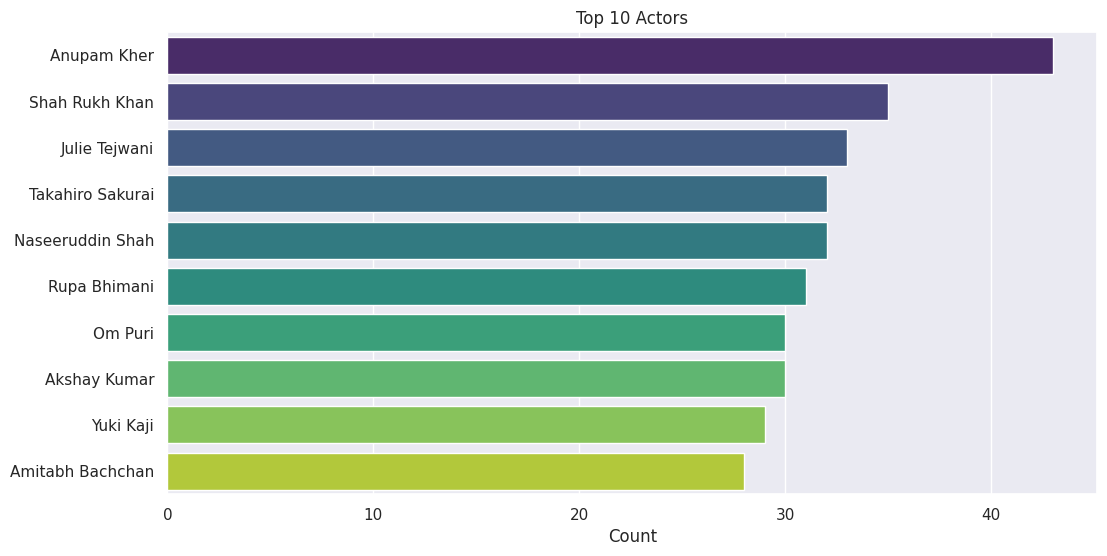

In [40]:
top_actors_df = netflix3[netflix3['cast'].isin(top_actors)]

plt.figure(figsize=(12, 6))
sns.countplot(y='cast', data=top_actors_df, order=top_actors, palette='viridis')
plt.title('Top 10 Actors')
plt.xlabel('Count')
plt.ylabel('')
plt.show()

### Top Directors

In [41]:
netflix['director'] = netflix['director'].str.split(', ')

In [42]:
print(netflix.shape)
netflix4 = netflix.explode('director')
netflix4.shape

(8804, 12)


(9609, 12)

In [43]:
top_director = netflix4['director'].value_counts().index[1:11]

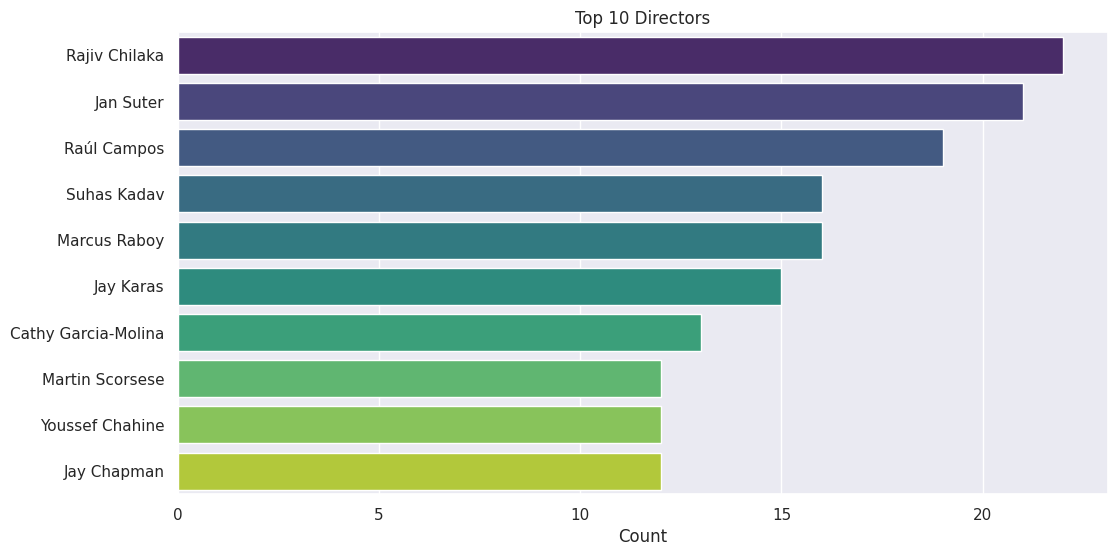

In [44]:
top_directors_df = netflix4[netflix4['director'].isin(top_director)]

plt.figure(figsize=(12, 6))
sns.countplot(y='director', data=top_directors_df, order=top_director, palette='viridis')
plt.title('Top 10 Directors')
plt.xlabel('Count')
plt.ylabel('')
plt.show()

### Top producing country

In [45]:
netflix['country'] = netflix['country'].str.split(', ')

In [46]:
print(netflix.shape)
netflix5 = netflix.explode('country')
netflix5.shape

(8804, 12)


(10842, 12)

In [47]:
# Filter out 'No country'
filtered_netflix = netflix5[netflix5['country'] != 'unknown country']

In [48]:
# Get the top 10 countries
top_country = filtered_netflix['country'].value_counts().index[:10]

In [49]:
# Filter the DataFrame to include only the top 10 countries
top_country_df = filtered_netflix[filtered_netflix['country'].isin(top_country)]

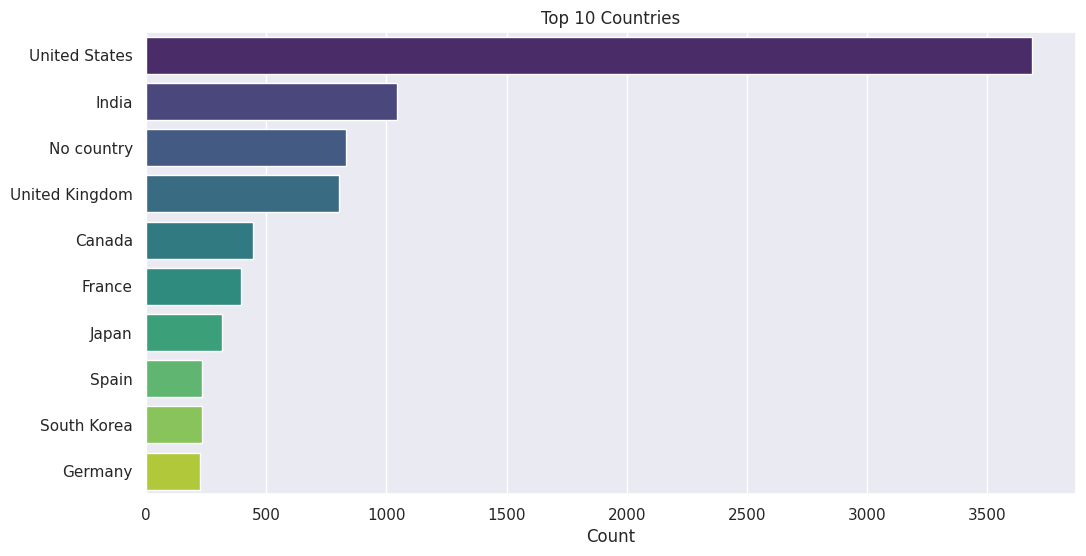

In [50]:
plt.figure(figsize=(12, 6))
sns.countplot(y='country', data=top_country_df, order=top_country, palette='viridis')
plt.title('Top 10 Countries')
plt.xlabel('Count')
plt.ylabel('')
plt.show()

* Most produced movies by far are from the US with over 3500 movies, which is over 3 times more than India, who have released around 1000 movies, followed by the UK with around 800 movies.

# Netflix Recommendation System

## Content Based Filtering

Movies are recommended based on their similarities with other movies. The system looks at different aspects of a movie, such as the cast, description, director, and genre, to find similarities, and generates recommendations, suggesting movies that the user might find interesting or relevant.

We will use TF-IDF Vectorizer and CountVectorizer to find similarities.

![Content based filtering!](https://miro.medium.com/v2/resize:fit:720/format:webp/1*BME1JjIlBEAI9BV5pOO5Mg.png "Content based filtering")

**TF-IDF**

The TfidfVectorizer is used to convert a collection of raw documents to a matrix of TF-IDF (Term Frequency-Inverse Document Frequency).

In [51]:
# Import the TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create an instance of the TfidfVectorizer and remove all stop-words
tfidf = TfidfVectorizer(stop_words='english')

In [52]:
# replace missing values with empty strings
netflix['description'] = netflix['description'].fillna('')

# create the TF-IDF matrix
tfidf_matrix = tfidf.fit_transform(netflix['description'])

# output the shape of tfidf_matrix
tfidf_matrix.shape

(8804, 18894)

The cosine similarity between each pair of items (movies in this case) is calculated using their TF-IDF vectors.

In [53]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [54]:
# Create a reverse map of indices and movie titles which maps each original title to an index
indices = pd.Series(netflix.index, index=netflix['title']).drop_duplicates()

In [55]:
# Define the recommendation function
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Select the top 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the titles of the recommended movies
    return netflix['title'].iloc[movie_indices]

This function will return a list of recommended movies. It does this by first get the index of the movie that matches the title, calculating the cosine similarity scores of this movie with all the other movies, and then sorting these scores to get the most similar movies. The top 10 most similar movies are returned.

In [56]:
netflix.title.head()

0     Dick Johnson Is Dead
1            Blood & Water
2                Ganglands
3    Jailbirds New Orleans
4             Kota Factory
Name: title, dtype: object

In [57]:
get_recommendations('Dick Johnson Is Dead')

4877                                   End Game
1066                                   The Soul
7506                                       Moon
5047                    The Cloverfield Paradox
5233    The Death and Life of Marsha P. Johnson
5494                                   Kazoops!
2674                                      Alelí
4241                  Secrets in the Hot Spring
4735                     Tere Naal Love Ho Gaya
2760              Kannum Kannum Kollaiyadithaal
Name: title, dtype: object

In [58]:
get_recommendations('Ganglands')

424     Chhota Bheem: The Rise of Kirmada
5113                               Bright
6592                       Den of Thieves
5305                               Narcos
3451                    Kids on the Block
711                              Security
1905                         Cold Harbour
4031        Hajwala 2: Mysterious Mission
3976               The Eagle of El-Se'eed
7463                        Miss Dynamite
Name: title, dtype: object

* If we look at the movie suggestions we got on [IMDB](https://imdb.com) we can see that many of the movies are not that similar. We will try CountVectorizer with more features and see if it performs better.

**CountVectorizer**

In [59]:
# Select features
features=['genre','director','cast','description','title']
netflix_data = netflix[features]

In [60]:
# Function to clean data, make everything lower case and remove spaces
def clean_data(x):
    if isinstance(x, list):
        return str.lower(" ".join(x).replace(" ", ""))
    else:
        return str.lower(x.replace(" ", ""))

In [61]:
for feature in features:
    netflix_data[feature] = netflix_data[feature].apply(clean_data)

In [62]:
netflix_data.head()

,genre,director,cast,description,title
0,documentaries,kirstenjohnson,nocast,"asherfathernearstheendofhislife,filmmakerkirst...",dickjohnsonisdead
1,internationaltvshowstvdramastvmysteries,nodirector,amaqamatakhosingemagailmabalanethabangmolabadi...,"aftercrossingpathsataparty,acapetownteensetsou...",blood&water
2,crimetvshowsinternationaltvshowstvaction&adven...,julienleclercq,samibouajilatracygotoassamueljouynabihaakkaris...,"toprotecthisfamilyfromapowerfuldruglord,skille...",ganglands
3,docuseriesrealitytv,nodirector,nocast,"feuds,flirtationsandtoilettalkgodownamongthein...",jailbirdsneworleans
4,internationaltvshowsromantictvshowstvcomedies,nodirector,mayurmorejitendrakumarranjanrajalamkhanahsaasc...,inacityofcoachingcentersknowntotrainindia’sfin...,kotafactory


In [63]:
def create_soup(x):
    return x['director'] + ' ' + x['cast'] + ' ' +x['genre']+' '+ x['description']

In [64]:
netflix_data['soup'] = netflix_data.apply(create_soup, axis=1)

In [65]:
# Import necessary libraries and create the count matrix
from sklearn.feature_extraction.text import CountVectorizer

count_vec = CountVectorizer(stop_words='english')

# # Create a matrix of word counts from the 'soup'
count_matrix = count_vec.fit_transform(netflix_data['soup'])

In [66]:
# Compute the Cosine Similarity matrix based on the count_matrix
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [67]:
netflix_data.head()

,genre,director,cast,description,title,soup
0,documentaries,kirstenjohnson,nocast,"asherfathernearstheendofhislife,filmmakerkirst...",dickjohnsonisdead,kirstenjohnson nocast documentaries asherfathe...
1,internationaltvshowstvdramastvmysteries,nodirector,amaqamatakhosingemagailmabalanethabangmolabadi...,"aftercrossingpathsataparty,acapetownteensetsou...",blood&water,nodirector amaqamatakhosingemagailmabalanethab...
2,crimetvshowsinternationaltvshowstvaction&adven...,julienleclercq,samibouajilatracygotoassamueljouynabihaakkaris...,"toprotecthisfamilyfromapowerfuldruglord,skille...",ganglands,julienleclercq samibouajilatracygotoassamueljo...
3,docuseriesrealitytv,nodirector,nocast,"feuds,flirtationsandtoilettalkgodownamongthein...",jailbirdsneworleans,"nodirector nocast docuseriesrealitytv feuds,fl..."
4,internationaltvshowsromantictvshowstvcomedies,nodirector,mayurmorejitendrakumarranjanrajalamkhanahsaasc...,inacityofcoachingcentersknowntotrainindia’sfin...,kotafactory,nodirector mayurmorejitendrakumarranjanrajalam...


In [68]:
# Reset the index and reverse map the titles to indices
netflix_data=netflix_data.reset_index()
indices = pd.Series(netflix_data.index, index=netflix_data['title'])

In [69]:
# Function to return recommendations
def get_recommendations_modified(title, cosine_sim=cosine_sim):
    title=title.replace(' ','').lower()
    idx = indices[title]

    # Compute the similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return netflix['title'].iloc[movie_indices]

This process is the same as before, except now we are indexing with the original title (with lowercase and without spaces) in our DataFrame, and we are computing the cosine similarity scores based on the soup.

In [70]:
# testing the recommendation system
get_recommendations_modified('Ganglands', cosine_sim2)

11            Bangkok Breaking
734                      Lupin
3976    The Eagle of El-Se'eed
4662              Monkey Twins
4752                   Smoking
6741             Fatal Destiny
543                 Undercover
1223                    Dealer
5194                 The Truth
6102              Agent Raghav
Name: title, dtype: object

In [71]:
get_recommendations_modified('Angry Birds', cosine_sim2)

751                              Guru Aur Bhole
3806                           Prince of Peoria
3861          Cupcake & Dino - General Services
234                                   Oggy Oggy
530                                 Richie Rich
1429         Mighty Little Bheem: Kite Festival
1687            The Boss Baby: Back in Business
1973                              Fukrey Boyzzz
2841    Mighty Little Bheem: Festival of Colors
2937                     Dragons: Rescue Riders
Name: title, dtype: object

In [72]:
get_recommendations_modified('Attack on Titan', cosine_sim2)

2965                 No Game No Life
3588                  Cannon Busters
3723    Magi: The Labyrinth of Magic
5178                  Fate/Apocrypha
219                       EDENS ZERO
338           Hunter X Hunter (2011)
453                         BEASTARS
631            The Seven Deadly Sins
639          Godzilla Singular Point
835                             Eden
Name: title, dtype: object

### Much better!
From what we can see from [IMDB](https://imdb.com) it gives quite good recommendations based on similarity.

**Sources:**
* Basic Syntax Markdown Guide
  - https://www.markdownguide.org/basic-syntax/#html
* TV and Movie Ratings with Descriptions
  - https://www.spectrum.net/support/tv/tv-and-movie-ratings-descriptions
* Visualize missing values with missingo
  - https://www.geeksforgeeks.org/python-visualize-missing-values-nan-values-using-missingno-library/
* Generating WordCloud in python
  - https://www.projectpro.io/recipes/create-word-cloud-python
  - https://www.geeksforgeeks.org/generating-word-cloud-python/)
  - https://www.analyticsvidhya.com/blog/2021/05/how-to-build-word-cloud-in-python/
* Reshape a DataFrame or Series with Pandas explode() method
  - https://bindichen.medium.com/exploding-a-list-like-column-with-pandas-explode-method-3ffd41f9f7e2
* CountVectorizer and TFIDFVectorizer
  - https://enjoymachinelearning.com/blog/countvectorizer-vs-tfidfvectorizer/
  - https://www.analyticsvidhya.com/blog/2021/07/bag-of-words-vs-tfidf-vectorization-a-hands-on-tutorial/
  - https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
  - https://www.capitalone.com/tech/machine-learning/understanding-tf-idf/
  - https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
  - https://colab.research.google.com/github/littlecolumns/ds4j-notebooks/blob/master/text-analysis/notebooks/Counting%20words%20with%20scikit-learn's%20CountVectorizer.ipynb
  - https://www.analyticsvidhya.com/blog/2022/09/implementing-count-vectorizer-and-tf-idf-in-nlp-using-pyspark/